In [ ]:
pip install pywaffle

In [1]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import random
import datetime
from pywaffle import Waffle 
import plotly.express as px

In [3]:
df_HD = pd.read_excel("Cardiac_Outcomes.xlsx", "Hospitalization_Discharge")
df_CC = pd.read_excel("Cardiac_Outcomes.xlsx", "CardiacComplications")
df_Res = pd.read_excel("Cardiac_Outcomes.xlsx", "Responsivenes")
df_PH = pd.read_excel("Cardiac_Outcomes.xlsx", "PatientHistory")
df_Labs = pd.read_excel("Cardiac_Outcomes.xlsx", "Labs")
df_Demography = pd.read_excel("Cardiac_Outcomes.xlsx", "Demography")
df_Ppres = pd.read_excel("Cardiac_Outcomes.xlsx", "Patient_Precriptions")


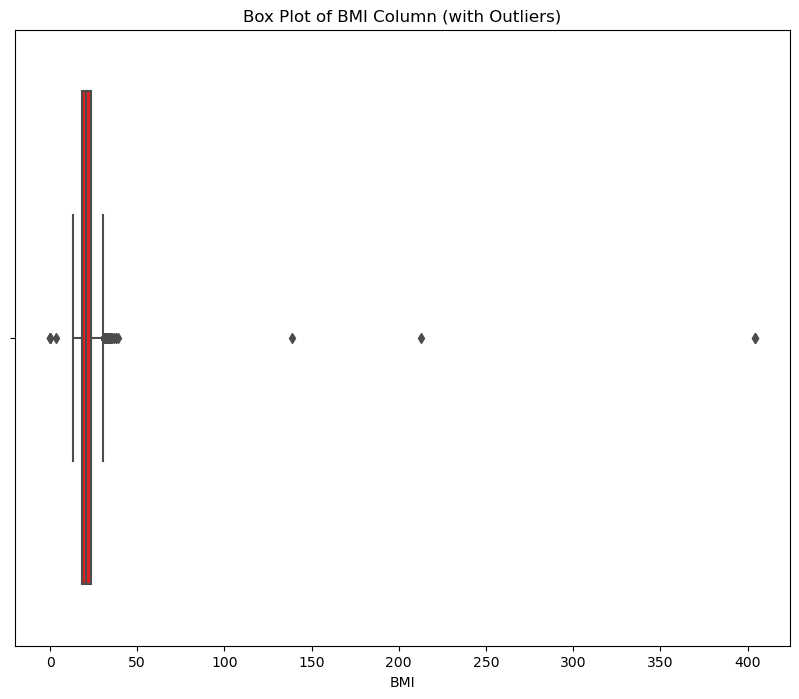

In [4]:
#1.showing outliers in BMI column using box plot


df = df_Demography.copy()

# Plotting the box plot to visualize the distribution of BMI
plt.figure(figsize=(10, 8))
sns.boxplot(x='BMI', data=df, orient='h', color='Red', fliersize=5, linewidth=1.5)
plt.title('Box Plot of BMI Column (with Outliers)')
plt.xlabel('BMI')
plt.show()

<Figure size 1000x600 with 0 Axes>

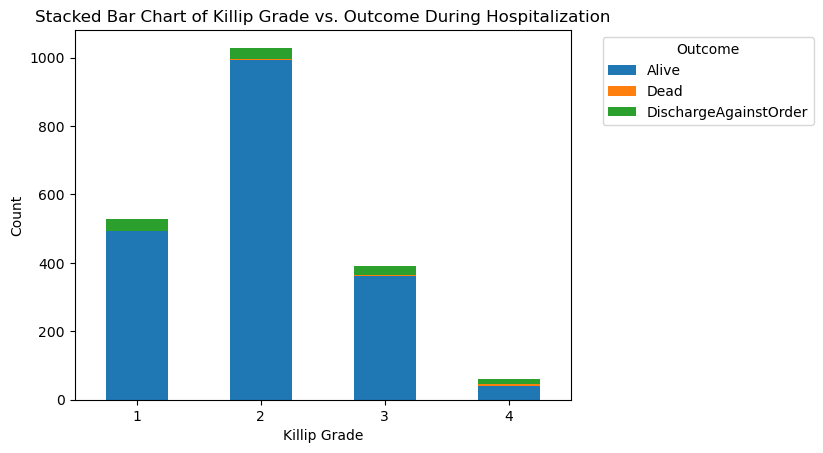

In [5]:
#2. Bar Chart of Killip Grade vs. Outcome During Hospitalization


merged_data = pd.merge(df_CC[['inpatient_number', 'Killip_grade']], 
                        df_HD[['inpatient_number', 'outcome_during_hospitalization']],
                        on='inpatient_number', how='inner')

# Group by 'killip_grade' and 'outcome_during_hospitalization' and count occurrences
grouped_counts = merged_data.groupby(['Killip_grade', 'outcome_during_hospitalization']).size().unstack()

# Plotting the stacked bar chart
plt.figure(figsize=(10, 6))
grouped_counts.plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Killip Grade vs. Outcome During Hospitalization')
plt.xlabel('Killip Grade')
plt.ylabel('Count')
plt.xticks(rotation=0)  
plt.legend(title='Outcome', bbox_to_anchor=(1.05, 1), loc='upper left') 
autopct='%1.1f%%'

plt.show()

<Figure size 1000x600 with 0 Axes>

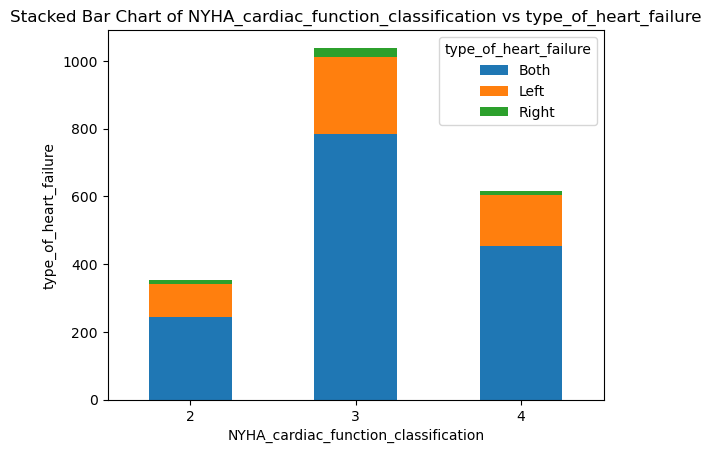

In [6]:
#3.Stacked Bar Chart of NYHA_cardiac_function_classification vs type_of_heart_failure


df =df_CC[['type_of_heart_failure', 'NYHA_cardiac_function_classification']]
                        

grouped_counts = df.groupby(['NYHA_cardiac_function_classification', 'type_of_heart_failure']).size().unstack()

# Plotting the stacked bar chart
plt.figure(figsize=(10, 6))
grouped_counts.plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of NYHA_cardiac_function_classification vs type_of_heart_failure')
plt.xlabel('NYHA_cardiac_function_classification')
plt.ylabel('type_of_heart_failure')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed

plt.show()

<Figure size 1000x600 with 0 Axes>

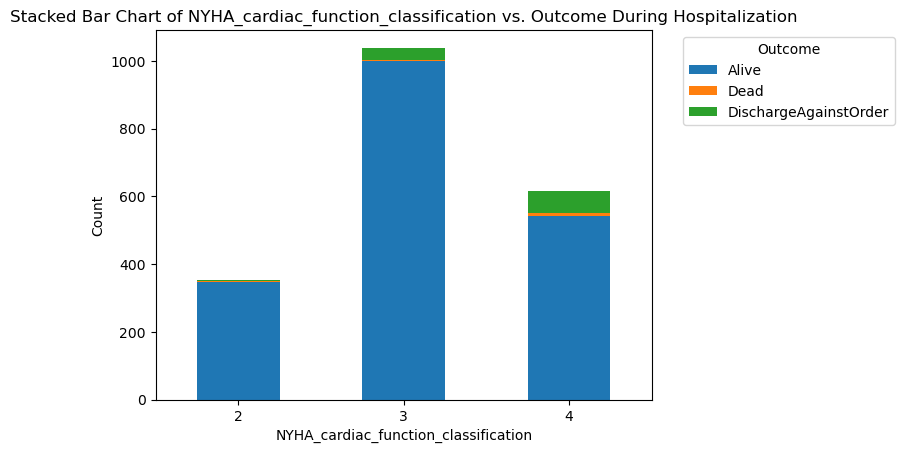

In [7]:
#4.Stacked Bar Chart of NYHA_cardiac_function_classification vs. Outcome During Hospitalization

import pandas as pd
import matplotlib.pyplot as plt



# Merge the DataFrames on 'inpatient_number' to combine the required columns
merged_data = pd.merge(df_CC[['inpatient_number', 'NYHA_cardiac_function_classification']], 
                        df_HD[['inpatient_number', 'outcome_during_hospitalization']],
                        on='inpatient_number', how='inner')

# Group by 'killip_grade' and 'outcome_during_hospitalization' and count occurrences
grouped_counts = merged_data.groupby(['NYHA_cardiac_function_classification', 'outcome_during_hospitalization']).size().unstack()
#ax = grouped_counts.plot(kind='bar', stacked=True)
#for container in ax.containers:
   # ax.bar_label(container, label_type='edge', padding=3)
# Plotting the stacked bar chart
plt.figure(figsize=(10, 6))
grouped_counts.plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of NYHA_cardiac_function_classification vs. Outcome During Hospitalization')
plt.xlabel('NYHA_cardiac_function_classification')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.legend(title='Outcome', bbox_to_anchor=(1.05, 1), loc='upper left') 
autopct='%1.1f%%'
# Adjust legend position
plt.show()

In [ ]:
#5. Uniformizing BMI Column  2 digit before decimaland 2 digit after decimal.
df=df_Demography
BMI=df['BMI']
Inpatient_no=df['inpatient_number']
df2 = pd.DataFrame({'inpatient_number': Inpatient_no, 'BMI': BMI})
print(df2)

def uniformize_bmi(bmi):
    # Convert the BMI value to a string for formatting
    bmi_str = f'{bmi:.2f}'  # Format to two decimal places
    
    # Extract the integer and decimal parts
    integer_part, decimal_part = bmi_str.split('.')
    
    # Ensure two digits before the decimal point
    if len(integer_part) > 2:
        # Truncate to two digits before the decimal point
        integer_part = integer_part[-2:]
    
    # Combine the formatted parts and convert back to float
    uniform_bmi = float(f'{integer_part}.{decimal_part}')
    
    return uniform_bmi

# Check the column names of df_Demography
print(df_Demography.columns)

# Apply the uniformize_bmi function to the BMI column
df_Demography['BMI'] = df_Demography['BMI'].apply(uniformize_bmi)

# Display the updated DataFrame
print(df_Demography)